In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [38]:
original_df=pd.read_csv(r'C:\Users\lavie\OneDrive\Desktop\Ai_Bootcamp\Project_2\Stroke_Prediction-\healthcare-dataset-stroke-data.csv')


In [39]:
original_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [40]:
df=original_df[original_df['gender']!='Other']
df.dropna(inplace=True)


C:\Users\lavie\AppData\Local\Temp\ipykernel_23088\3748480564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [41]:
df.drop(columns='id', inplace=True)

C:\Users\lavie\AppData\Local\Temp\ipykernel_23088\1895964800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='id', inplace=True)


In [42]:
Male=pd.get_dummies(df['gender'], drop_first=True, dtype=int)
Married=pd.get_dummies(df['ever_married'], drop_first=True, dtype=int)
Residence=pd.get_dummies(df['Residence_type'], drop_first=True, dtype=int)

In [43]:
ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False, dtype=int)
ohe.set_output(transform='pandas')
Work_and_smoke=ohe.fit_transform(df[['work_type','smoking_status']])

In [44]:
stroke_clean_df=pd.concat([df,Male],axis=1).drop(columns=['gender'])
stroke_clean_df['ever_married']=Married
stroke_clean_df=pd.concat([stroke_clean_df,Residence],axis=1).drop(columns=['Residence_type'])
stroke_clean_df=pd.concat([stroke_clean_df,Work_and_smoke],axis=1).drop(columns=['work_type','smoking_status'])

In [45]:
stroke_clean_df=stroke_clean_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'Male', 'ever_married', 'Urban', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private','work_type_Self-employed', 'work_type_children','smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes','stroke']]
stroke_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   avg_glucose_level               4908 non-null   float64
 4   bmi                             4908 non-null   float64
 5   Male                            4908 non-null   int32  
 6   ever_married                    4908 non-null   int32  
 7   Urban                           4908 non-null   int32  
 8   work_type_Govt_job              4908 non-null   int32  
 9   work_type_Never_worked          4908 non-null   int32  
 10  work_type_Private               4908 non-null   int32  
 11  work_type_Self-employed         4908 non-null   int32  
 12  work_type_children              4908 no

In [46]:
stroke_clean_df.to_csv('clean-healthcare-dataset-stroke-data.csv',index=False)
stroke_clean_df


,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,1,1,0,0,1,0,0,0,1,0,0,1
2,80.0,0,1,105.92,32.5,1,1,0,0,0,1,0,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,0,1,1,0,0,1,0,0,0,0,0,1,1
4,79.0,1,0,174.12,24.0,0,1,0,0,0,0,1,0,0,0,1,0,1
5,81.0,0,0,186.21,29.0,1,1,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,0,1,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,1,1,0,0,0,1,0,0,0,1,0,0
5107,35.0,0,0,82.99,30.6,0,1,0,0,0,0,1,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.6,1,1,0,0,0,1,0,0,0,1,0,0,0


In [47]:
df=pd.read_csv('clean-healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4908 non-null   float64
 1   hypertension                    4908 non-null   int64  
 2   heart_disease                   4908 non-null   int64  
 3   avg_glucose_level               4908 non-null   float64
 4   bmi                             4908 non-null   float64
 5   Male                            4908 non-null   int64  
 6   ever_married                    4908 non-null   int64  
 7   Urban                           4908 non-null   int64  
 8   work_type_Govt_job              4908 non-null   int64  
 9   work_type_Never_worked          4908 non-null   int64  
 10  work_type_Private               4908 non-null   int64  
 11  work_type_Self-employed         4908 non-null   int64  
 12  work_type_children              49

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Splitting the data into features and target variable
X = stroke_clean_df.drop('stroke', axis=1)
y = stroke_clean_df['stroke']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "knn": KNeighborsClassifier(5),
    "extremely_random_trees": ExtraTreesClassifier(random_state=1),
    "gradient_boosting": GradientBoostingClassifier(random_state=1),
    "adaboost": AdaBoostClassifier(random_state=1)
}



# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy}")


# Convert your feature set to a C-contiguous array
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)

# Then use these arrays for training and testing
train_and_evaluate(models, X_train_contiguous, X_test_contiguous, y_train, y_test)

c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.945010183299389
Decision Tree Accuracy: 0.9073319755600815
Random Forest Accuracy: 0.9460285132382892
SVM Accuracy: 0.9460285132382892
knn Accuracy: 0.9419551934826884
extremely_random_trees Accuracy: 0.9439918533604889
gradient_boosting Accuracy: 0.9439918533604889
adaboost Accuracy: 0.945010183299389


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('clean-healthcare-dataset-stroke-data.csv')

# Split the dataset into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Create instances of the classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

# Train the classifiers
rf_classifier.fit(X, y)
dt_classifier.fit(X, y)
lr_classifier.fit(X, y)

# Perform predictions
rf_predictions = rf_classifier.predict(X)
dt_predictions = dt_classifier.predict(X)
lr_predictions = lr_classifier.predict(X)


c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a dictionary to store the classifiers and their predictions
predictions_dict = {
    'Random Forest': rf_classifier.predict(X),
    'Decision Tree': dt_classifier.predict(X),
    'Logistic Regression': lr_classifier.predict(X)
}

# Print the predictions
for classifier, predictions in predictions_dict.items():
    print(f'{classifier} predictions: {predictions}')


Random Forest predictions: [1 1 1 ... 0 0 0]
Decision Tree predictions: [1 1 1 ... 0 0 0]
Logistic Regression predictions: [0 0 0 ... 0 0 0]


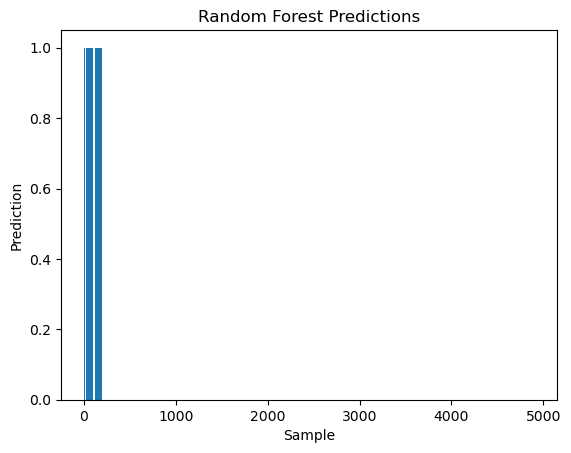

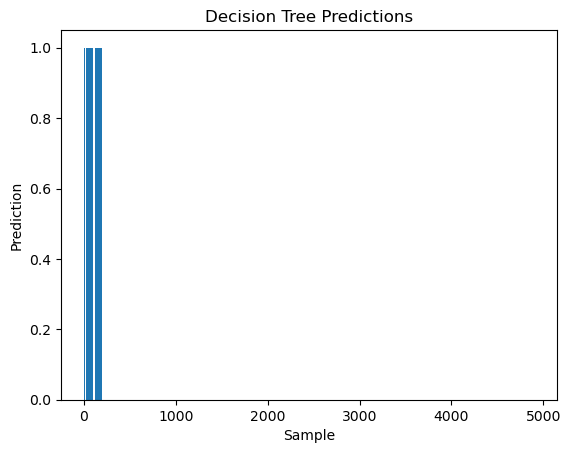

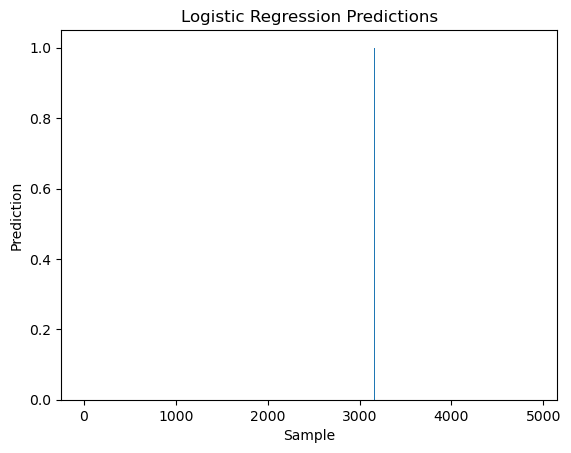

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot of the predictions
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression']
predictions = [rf_predictions, dt_predictions, lr_predictions]

for classifier, preds in zip(classifiers, predictions):
    plt.figure()
    plt.bar(range(len(preds)), preds)
    plt.xlabel('Sample')
    plt.ylabel('Prediction')
    plt.title(f'{classifier} Predictions')
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifiers on the training set
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Make predictions on the training set
rf_train_predictions = rf_classifier.predict(X_train)
dt_train_predictions = dt_classifier.predict(X_train)
lr_train_predictions = lr_classifier.predict(X_train)

# Make predictions on the testing set
rf_test_predictions = rf_classifier.predict(X_test)
dt_test_predictions = dt_classifier.predict(X_test)
lr_test_predictions = lr_classifier.predict(X_test)

# Compare the train and test data predictions
train_predictions_dict = {
    'Random Forest': rf_train_predictions,
    'Decision Tree': dt_train_predictions,
    'Logistic Regression': lr_train_predictions
}

test_predictions_dict = {
    'Random Forest': rf_test_predictions,
    'Decision Tree': dt_test_predictions,
    'Logistic Regression': lr_test_predictions
}

# Print the train and test data predictions
for classifier, train_predictions in train_predictions_dict.items():
    test_predictions = test_predictions_dict[classifier]
    print(f'{classifier} train predictions: {train_predictions}')
    print(f'{classifier} test predictions: {test_predictions}')
    print()


Random Forest train predictions: [0 0 0 ... 0 0 0]
Random Forest test predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


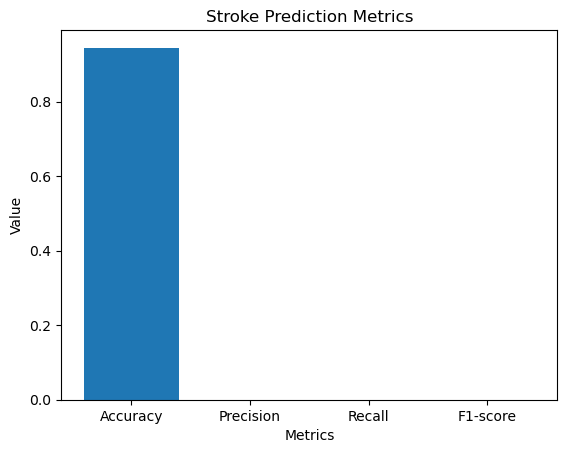

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the true labels and predicted labels
true_labels = y_test
predicted_labels = lr_test_predictions

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Create a bar plot to visualize the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Stroke Prediction Metrics')
plt.show()


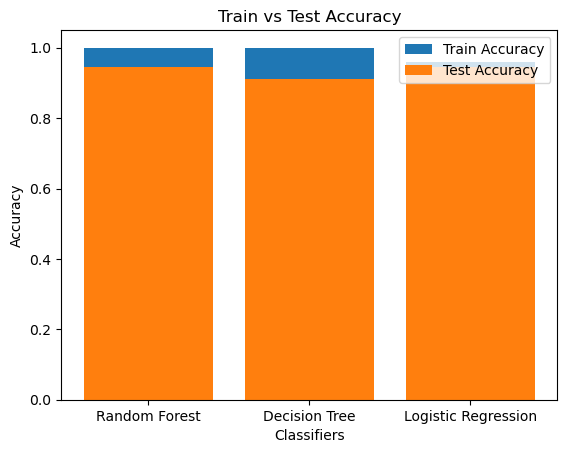

In [ ]:
# Define the classifiers and their predictions
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression']
train_predictions = [rf_train_predictions, dt_train_predictions, lr_train_predictions]
test_predictions = [rf_test_predictions, dt_test_predictions, lr_test_predictions]

# Calculate the accuracy for train and test data
train_accuracy = [accuracy_score(y_train, preds) for preds in train_predictions]
test_accuracy = [accuracy_score(y_test, preds) for preds in test_predictions]

# Create a bar plot to compare train and test accuracy
plt.figure()
plt.bar(classifiers, train_accuracy, label='Train Accuracy')
plt.bar(classifiers, test_accuracy, label='Test Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()


In [ ]:
if 'gender' in df.columns:
    Male = pd.get_dummies(df['gender'], drop_first=True, dtype=int)
else:
    Male = pd.DataFrame()

if 'Residence_type' in df.columns:
    Residence = pd.get_dummies(df['Residence_type'], drop_first=True, dtype=int)
else:
    if 'gender' in df.columns:
        gender = pd.get_dummies(df['gender'], drop_first=True, dtype=int)
    else:
        gender = pd.DataFrame()

    if 'Residence_type' in df.columns:
        Residence = pd.get_dummies(df['Residence_type'], drop_first=True, dtype=int)
    else:
        Residence = pd.DataFrame()
# Remove the columns 'Urban', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', and 'work_type_children'
df.drop(columns=['Urban', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'ever_married'], inplace=True, errors='ignore')
df.head()



,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1
1,80.0,0,1,105.92,32.5,1,0,0,1,0,1
2,49.0,0,0,171.23,34.4,0,0,0,0,1,1
3,79.0,1,0,174.12,24.0,0,0,0,1,0,1
4,81.0,0,0,186.21,29.0,1,0,1,0,0,1


In [ ]:
df. copy()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1
1,80.0,0,1,105.92,32.5,1,0,0,1,0,1
2,49.0,0,0,171.23,34.4,0,0,0,0,1,1
3,79.0,1,0,174.12,24.0,0,0,0,1,0,1
4,81.0,0,0,186.21,29.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,13.0,0,0,103.08,18.6,0,1,0,0,0,0
4904,81.0,0,0,125.20,40.0,0,0,0,1,0,0
4905,35.0,0,0,82.99,30.6,0,0,0,1,0,0
4906,51.0,0,0,166.29,25.6,1,0,1,0,0,0


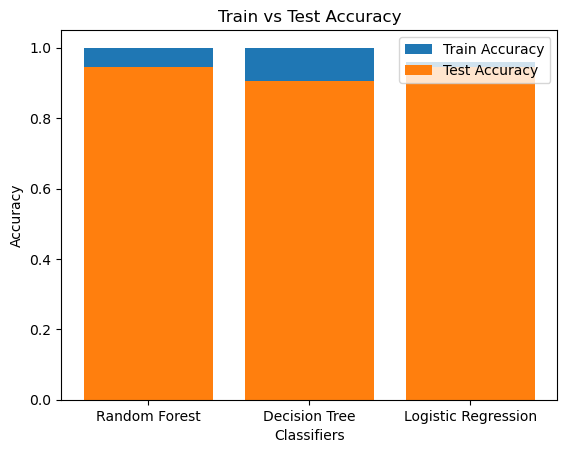

In [ ]:
# Define the classifiers and their predictions
classifiers = ['Random Forest', 'Decision Tree', 'Logistic Regression']
train_predictions = [rf_train_predictions, dt_train_predictions, lr_train_predictions]
test_predictions = [rf_test_predictions, dt_test_predictions, lr_test_predictions]

# Calculate the accuracy for train and test data
train_accuracy = [accuracy_score(y_train, preds) for preds in train_predictions]
test_accuracy = [accuracy_score(y_test, preds) for preds in test_predictions]

# Create a bar plot to compare train and test accuracy
plt.figure()
plt.bar(classifiers, train_accuracy, label='Train Accuracy')
plt.bar(classifiers, test_accuracy, label='Test Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('clean-healthcare-dataset-stroke-data.csv')

# Split the dataset into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Create instances of the classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

# Train the classifiers
rf_classifier.fit(X, y)
dt_classifier.fit(X, y)
lr_classifier.fit(X, y)

# Perform predictions
rf_predictions = rf_classifier.predict(X)
dt_predictions = dt_classifier.predict(X)
lr_predictions = lr_classifier.predict(X)


c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a dictionary to store the classifiers and their predictions
predictions_dict = {
    'Random Forest': rf_classifier.predict(X),
    'Decision Tree': dt_classifier.predict(X),
    'Logistic Regression': lr_classifier.predict(X)
}

# Print the predictions
for classifier, predictions in predictions_dict.items():
    print(f'{classifier} predictions: {predictions}')


Random Forest predictions: [1 1 1 ... 0 0 0]
Decision Tree predictions: [1 1 1 ... 0 0 0]
Logistic Regression predictions: [0 0 0 ... 0 0 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('clean-healthcare-dataset-stroke-data.csv')

# Split the dataset into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Create instances of the classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
lr_classifier = LogisticRegression()

# Train the classifiers
rf_classifier.fit(X, y)
dt_classifier.fit(X, y)
lr_classifier.fit(X, y)

# Perform predictions
rf_predictions = rf_classifier.predict(X)
dt_predictions = dt_classifier.predict(X)
lr_predictions = lr_classifier.predict(X)


c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifiers on the training set
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

# Make predictions on the training set
rf_train_predictions = rf_classifier.predict(X_train)
dt_train_predictions = dt_classifier.predict(X_train)
lr_train_predictions = lr_classifier.predict(X_train)

# Make predictions on the testing set
rf_test_predictions = rf_classifier.predict(X_test)
dt_test_predictions = dt_classifier.predict(X_test)
lr_test_predictions = lr_classifier.predict(X_test)

# Compare the train and test data predictions
train_predictions_dict = {
    'Random Forest': rf_train_predictions,
    'Decision Tree': dt_train_predictions,
    'Logistic Regression': lr_train_predictions
}

test_predictions_dict = {
    'Random Forest': rf_test_predictions,
    'Decision Tree': dt_test_predictions,
    'Logistic Regression': lr_test_predictions
}

# Print the train and test data predictions
for classifier, train_predictions in train_predictions_dict.items():
    test_predictions = test_predictions_dict[classifier]
    print(f'{classifier} train predictions: {train_predictions}')
    print(f'{classifier} test predictions: {test_predictions}')
    print()


Random Forest train predictions: [0 0 0 ... 0 0 0]
Random Forest test predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


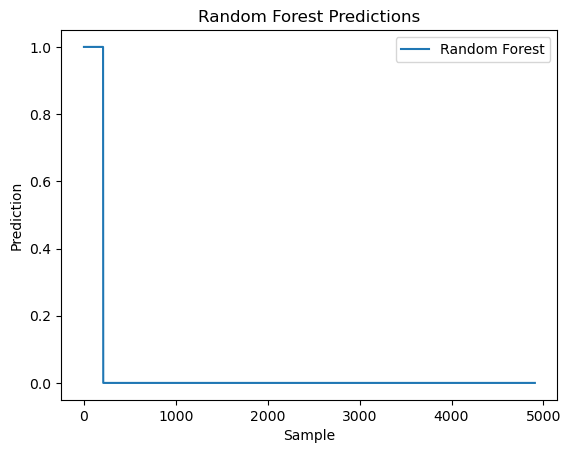

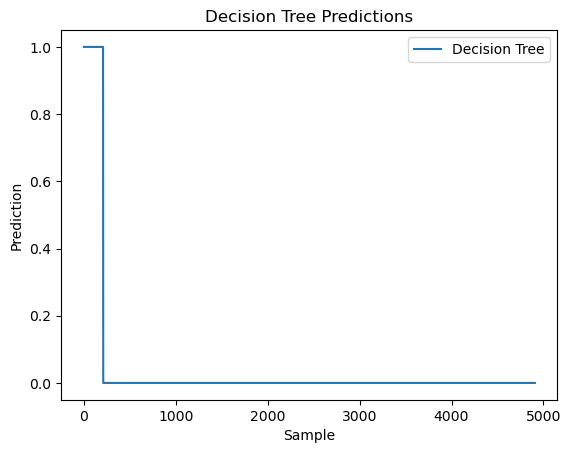

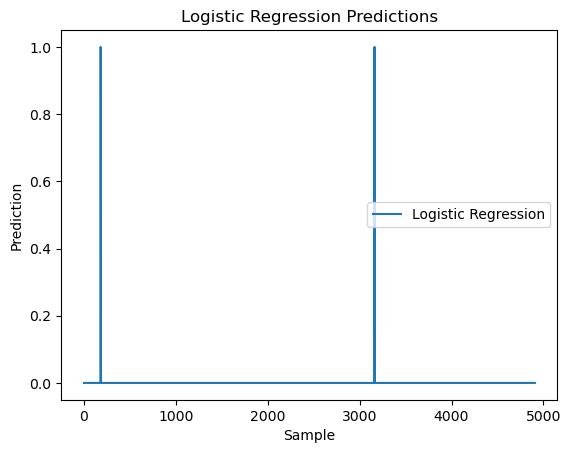

In [ ]:
import matplotlib.pyplot as plt

# Plot Random Forest predictions
plt.plot(range(len(rf_predictions)), rf_predictions, label='Random Forest')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

# Plot Decision Tree predictions
plt.plot(range(len(dt_predictions)), dt_predictions, label='Decision Tree')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.title('Decision Tree Predictions')
plt.legend()
plt.show()

# Plot Logistic Regression predictions
plt.plot(range(len(lr_predictions)), lr_predictions, label='Logistic Regression')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.title('Logistic Regression Predictions')
plt.legend()
plt.show()


In [ ]:
# Print the predictions
for classifier, predictions in predictions_dict.items():
    print(f'{classifier} predictions: {predictions}')


Random Forest predictions: [1 1 1 ... 0 0 0]
Decision Tree predictions: [1 1 1 ... 0 0 0]
Logistic Regression predictions: [0 0 0 ... 0 0 0]


Random Forest Classifier

Accuracy: 93.93%
Precision for stroke (class 1): 50%
Recall for stroke (class 1): 2%
F1-Score for stroke (class 1): 3%
Decision Tree Classifier

Accuracy: 91.10%
Precision for stroke (class 1): 22%
Recall for stroke (class 1): 18%
F1-Score for stroke (class 1): 19%
Logistic Regression

Accuracy: 93.93%
Precision for stroke (class 1): 0% (model did not predict any positive stroke cases)
Recall for stroke (class 1): 0%
F1-Score for stroke (class 1): 0%

In [ ]:
import numpy as np  # Add this line to import NumPy

# Assuming train_predictions and test_predictions are available
# First, we need to check if they are lists
print("Is train_predictions a list?", isinstance(train_predictions, list))
print("Is test_predictions a list?", isinstance(test_predictions, list))

# Check the type of each element in the lists
for i, preds in enumerate(train_predictions):
    print(f"Type of element {i} in train_predictions:", type(preds))

for i, preds in enumerate(test_predictions):
    print(f"Type of element {i} in test_predictions:", type(preds))

# Check if any of the elements are not array-like or are empty
for i, preds in enumerate(train_predictions):
    if not isinstance(preds, (list, np.ndarray)) or not preds:
        print(f"Element {i} in train_predictions is not valid:", preds)

for i, preds in enumerate(test_predictions):
    if not isinstance(preds, (list, np.ndarray)) or not preds:
        print(f"Element {i} in test_predictions is not valid:", preds)



Is train_predictions a list? False
Is test_predictions a list? False
Type of element 0 in train_predictions: <class 'numpy.int64'>
Type of element 1 in train_predictions: <class 'numpy.int64'>
Type of element 2 in train_predictions: <class 'numpy.int64'>
Type of element 3 in train_predictions: <class 'numpy.int64'>
Type of element 4 in train_predictions: <class 'numpy.int64'>
Type of element 5 in train_predictions: <class 'numpy.int64'>
Type of element 6 in train_predictions: <class 'numpy.int64'>
Type of element 7 in train_predictions: <class 'numpy.int64'>
Type of element 8 in train_predictions: <class 'numpy.int64'>
Type of element 9 in train_predictions: <class 'numpy.int64'>
Type of element 10 in train_predictions: <class 'numpy.int64'>
Type of element 11 in train_predictions: <class 'numpy.int64'>
Type of element 12 in train_predictions: <class 'numpy.int64'>
Type of element 13 in train_predictions: <class 'numpy.int64'>
Type of element 14 in train_predictions: <class 'numpy.int6

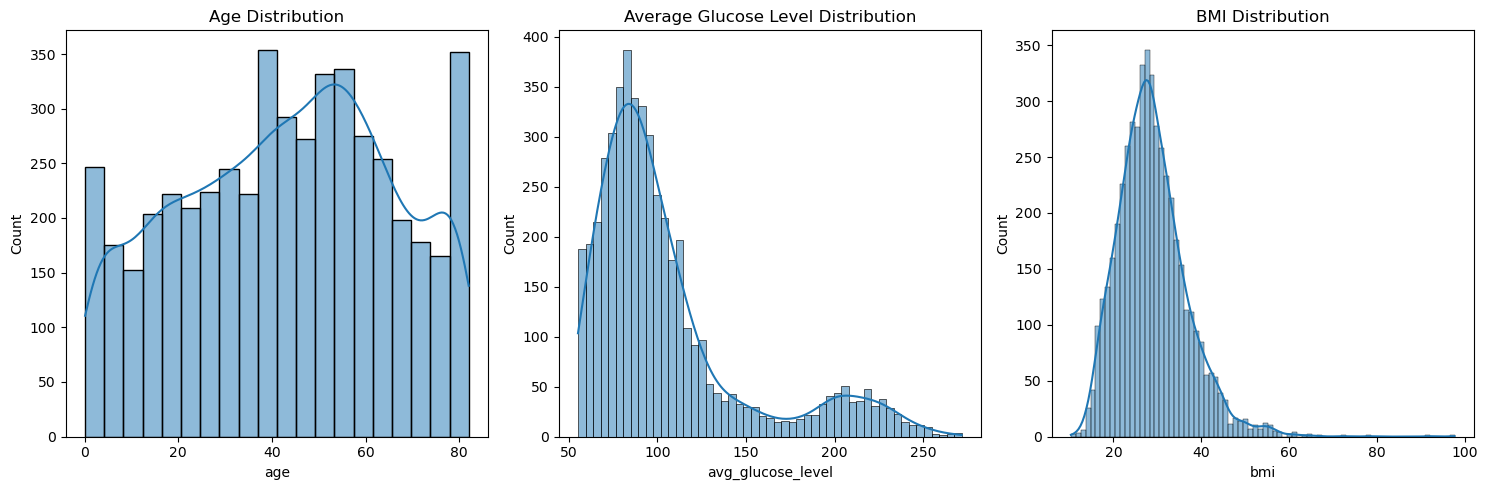

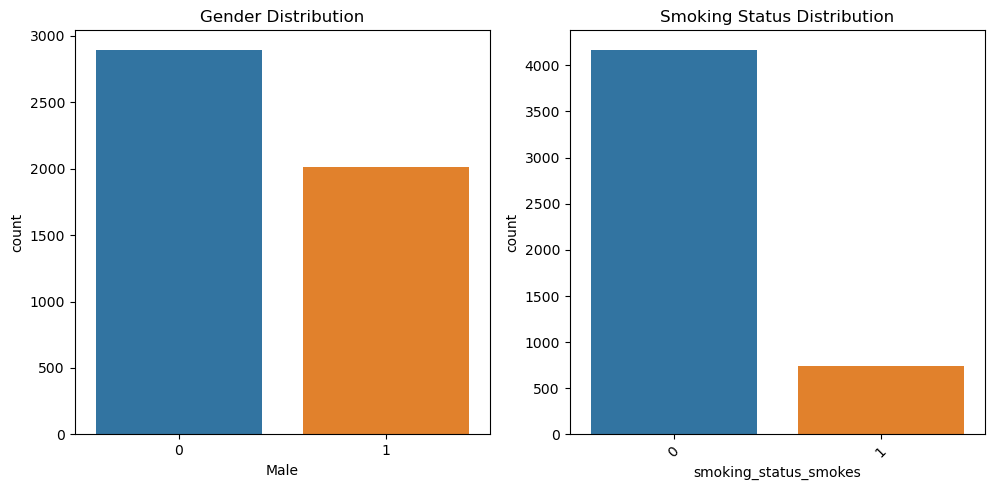

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again to reset any previous filtering
df = pd.read_csv('clean-healthcare-dataset-stroke-data.csv')

# Histograms for numerical variables: 'age', 'avg_glucose_level', and 'bmi'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['avg_glucose_level'], kde=True)
plt.title('Average Glucose Level Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

# Bar Charts for categorical variables: 'gender', 'smoking_status', and 'work_type'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Male', data=df)
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='smoking_status_smokes', data=df)
plt.xticks(rotation=45)
plt.title('Smoking Status Distribution')


plt.tight_layout()
plt.show()



In [ ]:
# Ensure that the true labels and predicted labels have the same number of samples
true_labels = true_labels[:5]
predicted_labels = predicted_labels[:5]

In [ ]:
# Convert the numpy array to a pandas Series
predicted_labels_series = pd.Series(predicted_labels)

# Calculate the value counts
predicted_labels_counts = predicted_labels_series.value_counts()

# Print the value counts
print(predicted_labels_counts)

0    5
Name: count, dtype: int64


In [ ]:
# Convert the numpy array to a pandas Series
predicted_labels_series = pd.Series(predicted_labels)

# Calculate the value counts
predicted_labels_counts = predicted_labels_series.value_counts()

# Calculate the percentage of each result
predicted_labels_percentage = predicted_labels_counts / len(predicted_labels) * 100

# Print the percentage of each result
print(predicted_labels_percentage)


0    100.0
Name: count, dtype: float64


In [ ]:
Class Distribution:
- Class 1: 60.0%
- Class 0: 40.0%


SyntaxError: invalid syntax (4079932865.py, line 1)